# Decomposition

In machine learning (ML), decomposition refers to the process of breaking down a complex system or data structure into smaller, more manageable parts to simplify analysis, understanding, or processing. This technique is used in various ML contexts, including matrix operations, time series analysis, and model interpretation. 

Popular methods including: PCA, SVD, NMF, etc.

### Table of Contents
1. [Comparison of LDA and PCA 2D projection of Iris dataset](#Comparison-of-LDA-and-PCA-2D-projection-of-Iris-dataset)
2. [Incremental PCA](#Incremental-PCA)
3. [Kernel PCA](#Kernel-PCA)

## Comparison of LDA and PCA 2D projection of Iris dataset

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

explained variance ratio (first two components): [0.92461872 0.05306648]


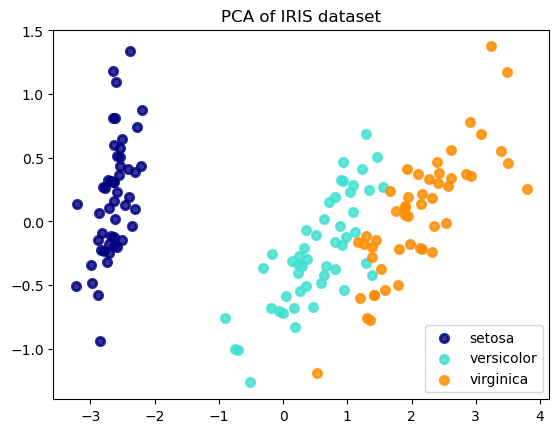

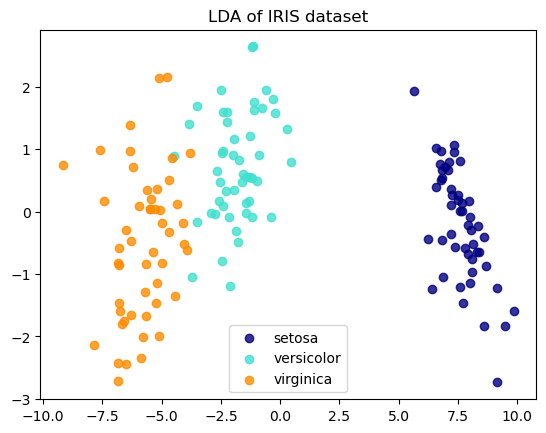

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

## Incremental PCA

Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

This example serves as a visual check that IPCA is able to find a similar projection of the data to PCA (to a sign flip), while only processing a few samples at a time. This can be considered a “toy example”, as IPCA is intended for large datasets which do not fit in main memory, requiring incremental approaches.

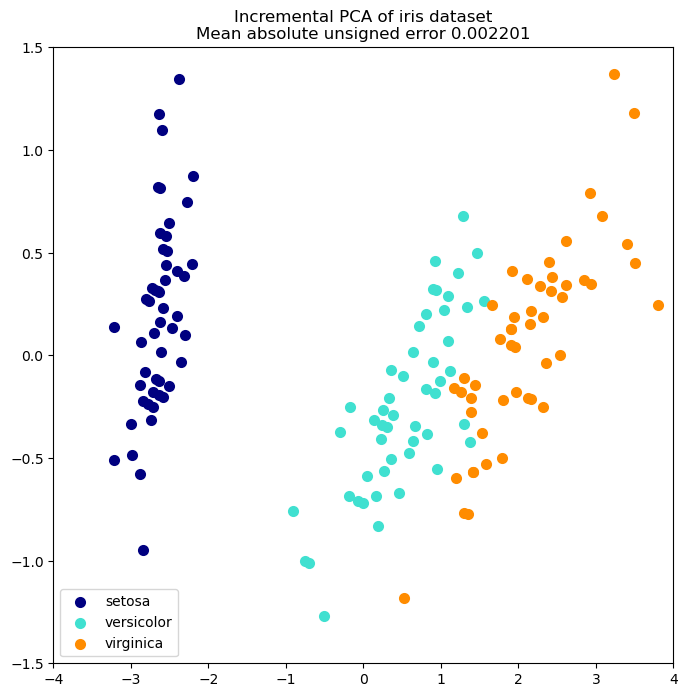

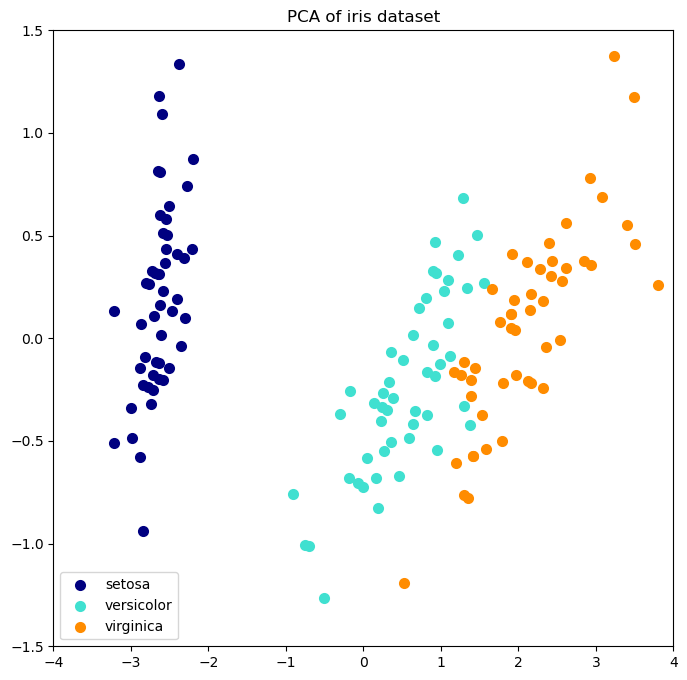

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

## Kernel PCA

This example shows the difference between the Principal Components Analysis (PCA) and its kernelized version (KernelPCA).

On the one hand, we show that KernelPCA is able to find a projection of the data which linearly separates them while it is not the case with PCA.

Finally, we show that inverting this projection is an approximation with KernelPCA, while it is exact with PCA.

### Projecting data: PCA vs. KernelPCA
In this section, we show the advantages of using a kernel when projecting data using a Principal Component Analysis (PCA). We create a dataset made of two nested circles.

In [3]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

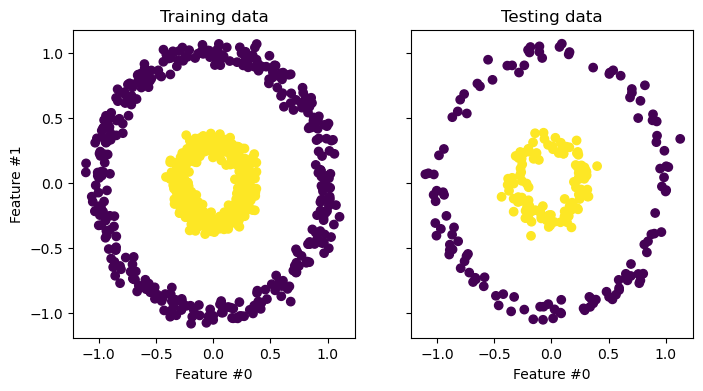

In [4]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

The samples from each class cannot be linearly separated: there is no straight line that can split the samples of the inner set from the outer set.

Now, we will use PCA with and without a kernel to see what is the effect of using such a kernel. The kernel used here is a radial basis function (RBF) kernel.

In [5]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

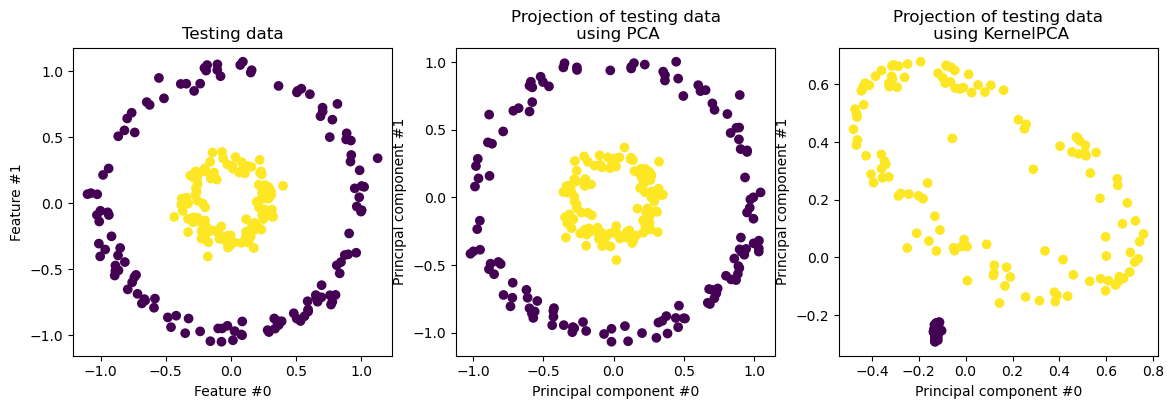

In [6]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

We recall that PCA transforms the data linearly. Intuitively, it means that the coordinate system will be centered, rescaled on each component with respected to its variance and finally be rotated. The obtained data from this transformation is isotropic and can now be projected on its principal components.

Thus, looking at the projection made using PCA (i.e. the middle figure), we see that there is no change regarding the scaling; indeed the data being two concentric circles centered in zero, the original data is already isotropic. However, we can see that the data have been rotated. As a conclusion, we see that such a projection would not help if define a linear classifier to distinguish samples from both classes.

Using a kernel allows to make a non-linear projection. Here, by using an RBF kernel, we expect that the projection will unfold the dataset while keeping approximately preserving the relative distances of pairs of data points that are close to one another in the original space.

We observe such behaviour in the figure on the right: the samples of a given class are closer to each other than the samples from the opposite class, untangling both sample sets. Now, we can use a linear classifier to separate the samples from the two classes.

### Projecting into the original feature space
One particularity to have in mind when using KernelPCA is related to the reconstruction (i.e. the back projection in the original feature space). With PCA, the reconstruction will be exact if n_components is the same than the number of original features. This is the case in this example.

We can investigate if we get the original dataset when back projecting with KernelPCA.

In [7]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

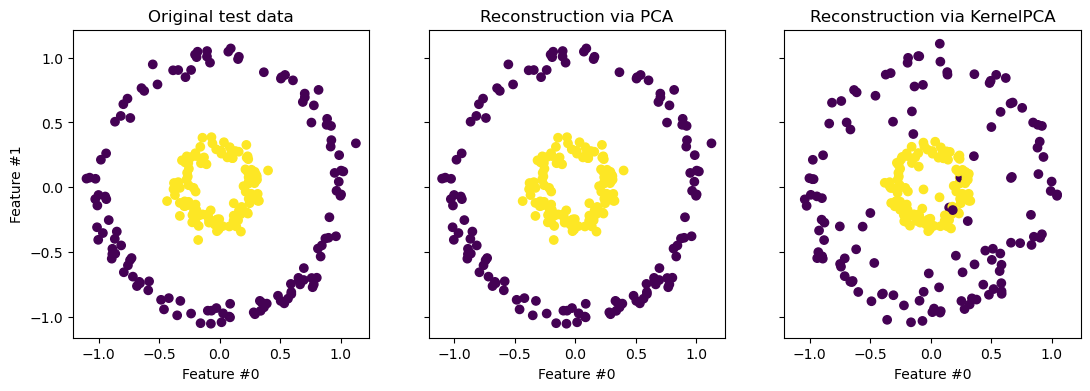

In [8]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

While we see a perfect reconstruction with PCA we observe a different result for KernelPCA.

Indeed, inverse_transform cannot rely on an analytical back-projection and thus an exact reconstruction. Instead, a KernelRidge is internally trained to learn a mapping from the kernalized PCA basis to the original feature space. This method therefore comes with an approximation introducing small differences when back projecting in the original feature space.

To improve the reconstruction using inverse_transform, one can tune alpha in KernelPCA, the regularization term which controls the reliance on the training data during the training of the mapping.